In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
nltk.download('popular')

from nltk.tokenize import sent_tokenize , word_tokenize
from nltk.chunk import ne_chunk
from nltk.tag import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error , accuracy_score , r2_score,classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

# Applied Statistics

###### Ex 1. For a given set of values in stats.xls that contains the list of employees, years of experience and their salary write a python script to calculate the mean, mode and median.

In [2]:
df = pd.read_excel('stats.xlsx')
print(df.describe(),'\n')

print("MEAN -----> YearsOfExp	:",(df['YearsOfExp'].mean()),"and for Salary in Rs. :",(df['Salary in Rs.'].mean()),'\n')
print("MEDAIAN --> YearsOfExp	:",(df['YearsOfExp'].median()),"and for Salary in Rs. :",(df['Salary in Rs.'].median()),'\n')
print("MODE -----> YearsOfExp	:",(df['YearsOfExp'].mode()[0])," and for Salary in Rs. :",(df['Salary in Rs.'].mode()[0]),'\n')

            Emp#  YearsOfExp  Salary in Rs.
count  25.000000   25.000000      25.000000
mean   13.000000    6.200000   77821.200000
std     7.359801    3.175426   39847.615281
min     1.000000    1.000000   12598.000000
25%     7.000000    3.000000   37592.000000
50%    13.000000    7.000000   87654.000000
75%    19.000000    9.000000  113112.000000
max    25.000000   10.000000  126015.000000 

MEAN -----> YearsOfExp	: 6.2 and for Salary in Rs. : 77821.2 

MEDAIAN --> YearsOfExp	: 7.0 and for Salary in Rs. : 87654.0 

MODE -----> YearsOfExp	: 10  and for Salary in Rs. : 100639 



###### Ex2. For the above exercise determine the standard deviation and variance through python scripting.

In [3]:
Standart_Deviation = np.std(df)  
print("SD ------------------------ \n",Standart_Deviation,"\n"  )  
variance = np.var(df)
print("Variance ------------------ \n",variance)

SD ------------------------ 
 Emp#                 7.211103
YearsOfExp           3.111270
Salary in Rs.    39042.529962
dtype: float64 

Variance ------------------ 
 Emp#             5.200000e+01
YearsOfExp       9.680000e+00
Salary in Rs.    1.524319e+09
dtype: float64


# Natural Language Processing

#### Ex 1. Write a python script that reads the data_in.csv from every cell in column labeled as comment and perform sentence tokenization and redirects in to column of data_out.csv. Perform the NE Chunking on these sentences.

In [4]:
df = pd.read_csv("data.csv")

#sentence tikenization
sent = [sent_tokenize(i) for i in df['Comment'] ]
print("Sentences : ",sent,'\n')

x = [sent[i][j] for i in range(len(sent)) for j in range(len(sent[i]))]
dict_df = pd.DataFrame({'sentences' :x})

#redirectiong to data_out.csv
dict_df.to_csv("data_out.csv",index=False)


#chuniking on senetences
data = pd.read_csv("data_out.csv")
chunked_data = [(ne_chunk(i)) for i in sent] 
print("Chunked data : ",chunked_data,'\n')

#chuniking and pos_tag on senetences
data = pd.read_csv("data_out.csv")
chunked_Pos_data =[(ne_chunk(pos_tag(i))) for i in sent]
print("Chunked POS data : ",chunked_Pos_data,'\n')


Sentences :  [['"Hello there, how are you?', 'Weather is awesome.', 'Its raining here now."'], ['"Hello Mr. Raja, how are you?', 'Weather is awesome.', 'Its raining here now."'], ['"Hello Mr. Raja, how are you.', 'Weather is bad.', 'Its heavily raining here now."'], ['"NLP is great technique.', 'It is nice to learn this technique."'], ['"AI is making difference in this world now.', 'It would be helpful for betterment of human life.', 'We need to make advantage of that."']] 

Chunked data :  [Tree('S', ['"Hello there, how are you?', 'Weather is awesome.', 'Its raining here now."']), Tree('S', ['"Hello Mr. Raja, how are you?', 'Weather is awesome.', 'Its raining here now."']), Tree('S', ['"Hello Mr. Raja, how are you.', 'Weather is bad.', 'Its heavily raining here now."']), Tree('S', ['"NLP is great technique.', 'It is nice to learn this technique."']), Tree('S', ['"AI is making difference in this world now.', 'It would be helpful for betterment of human life.', 'We need to make advantag

#### Ex 2. Write a python script that reads the data_in.csv from every cell in column labeled as comment and perform word tokenization and redirects in to column of data_out.csv

In [5]:
sent = [(word_tokenize(i)) for i in df['Comment'] ]
x = [sent[i][j] for i in range(len(sent)) for j in range(len(sent[i]))]
dict_df = pd.DataFrame({'words' :x})
dict_df.to_csv("data_out.csv",index=False)
print("Tokenized words : ",x)

Tokenized words :  ['``', 'Hello', 'there', ',', 'how', 'are', 'you', '?', 'Weather', 'is', 'awesome', '.', 'Its', 'raining', 'here', 'now', '.', "''", '``', 'Hello', 'Mr.', 'Raja', ',', 'how', 'are', 'you', '?', 'Weather', 'is', 'awesome', '.', 'Its', 'raining', 'here', 'now', '.', "''", '``', 'Hello', 'Mr.', 'Raja', ',', 'how', 'are', 'you', '.', 'Weather', 'is', 'bad', '.', 'Its', 'heavily', 'raining', 'here', 'now', '.', "''", '``', 'NLP', 'is', 'great', 'technique', '.', 'It', 'is', 'nice', 'to', 'learn', 'this', 'technique', '.', "''", '``', 'AI', 'is', 'making', 'difference', 'in', 'this', 'world', 'now', '.', 'It', 'would', 'be', 'helpful', 'for', 'betterment', 'of', 'human', 'life', '.', 'We', 'need', 'to', 'make', 'advantage', 'of', 'that', '.', "''"]


#### Ex3. From an input file data.txt it is required to identify the POS-Tagging and display it on tree structure.
#### Ex 4. For a given text file exclude the stop words and perform the Stemming & lemmatization and compare the results.

In [6]:
data = pd.read_csv("data.txt" ,sep='\n', header=None ,names=['Comments'])
words = [(word_tokenize(i)) for i in data['Comments']]

#Pats of speect tagging
pos = [pos_tag(i) for i in words]
print("POS tags: ",pos , '\n')

#tree
#for i in pos:
#    i.draw()

#stemming
stemmer = PorterStemmer()
for i in range(len(words)):
    for word in words[i]:
        stemmed_words = [stemmer.stem(word) for word in words[i] if word not in set(stopwords.words('english'))]        
print("Stemmed_words : " ,stemmed_words,"\n")

#lemmitizing
lemmatizer = WordNetLemmatizer()
for i in range(len(words)):
    for word in words[i]:
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words[i] if word not in set(stopwords.words('english'))]
print("Lemmatized_words : ",lemmatized_words)

POS tags:  [[('Hello', 'NNP'), ('there', 'RB'), (',', ','), ('how', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('?', '.'), ('Weather', "''"), ('is', 'VBZ'), ('awesome', 'JJ'), ('.', '.'), ('Its', 'PRP$'), ('raining', 'VBG'), ('here', 'RB'), ('now', 'RB'), ('.', '.')], [('Hello', 'NNP'), ('Mr.', 'NNP'), ('Raja', 'NNP'), (',', ','), ('how', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('?', '.'), ('Weather', "''"), ('is', 'VBZ'), ('awesome', 'JJ'), ('.', '.'), ('Its', 'PRP$'), ('raining', 'VBG'), ('here', 'RB'), ('now', 'RB'), ('.', '.')], [('Hello', 'NNP'), ('Mr.', 'NNP'), ('Raja', 'NNP'), (',', ','), ('how', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('.', '.'), ('Weather', 'CC'), ('is', 'VBZ'), ('bad', 'JJ'), ('.', '.'), ('Its', 'PRP$'), ('heavily', 'RB'), ('raining', 'VBG'), ('here', 'RB'), ('now', 'RB'), ('.', '.')], [('NLP', 'NNP'), ('is', 'VBZ'), ('great', 'JJ'), ('technique', 'NN'), ('.', '.'), ('It', 'PRP'), ('is', 'VBZ'), ('nice', 'JJ'), ('to', 'TO'), ('learn', 'VB'), ('this', 'DT'), ('te

#### Ex 5. Create a small dictionary file with required set of words with weightage attached to it with positive and negative numbers. Create a python script that analyzes the given text file and classify it as negative or positive sentiment.

In [7]:
senti_dict = {}

for each_line in open('dict.txt'):
    word,score = each_line.split('\t')
    senti_dict[word] = int(score)

with open('data_senti_analyze.txt') as fp:
    for line in fp:
            words = line.strip('.\n').lower().split()
            print(words)
            print(sum( senti_dict.get(word, 0) for word in words ))

['rose', 'is', 'beautiful']
2
['place', 'is', 'nasty', 'to', 'stay']
-3
['this', 'is', 'the', 'beauty', 'of', 'this', 'technique']
2
['concept', 'is', 'explained', 'beautifully', 'in', 'this', 'book']
3
['he', 'annoyed', 'me']
-1
['its', 'the', 'supreme', 'place', 'to', 'stay']
4
['i', 'hate', 'this', 'place']
-1
['dont', 'annoy', 'the', 'customer']
-1
['he', 'has', 'given', 'nasty', 'comments', 'about', 'his', 'stay']
-3
['dessert', 'is', 'awesome']
3
['your', 'gift', 'is', 'wonderful']
2


# Machine Learning

#### Ex 1. Data:1. Download the MPG data file from UCI Machine Learningrepository https://archive.ics.uci.edu/ml/machine-learningdatabases/auto-mpg/

#### 2. Identify target variable and independent variable.
#### 3. Prepare the data file

### UNIVARIATE

In [8]:
df = pd.read_csv('auto-mpg.csv',header=None)
df.head()
df_att = pd.read_csv('auto-mpg-names.csv',header=None)
temp=[]
for i in range(0,len(df_att[0])):
    temp.append(df_att[0][i])
print(temp)   

df.columns=temp

df.to_csv("auto-mpg-data.csv")

data = pd.read_csv("auto-mpg-data.csv",index_col='Unnamed: 0')
data.head()

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [11]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 31.1+ KB


### Preprocessing

In [13]:
data = data[data.horsepower!='?']
data.horsepower=data.horsepower.astype('int64')
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


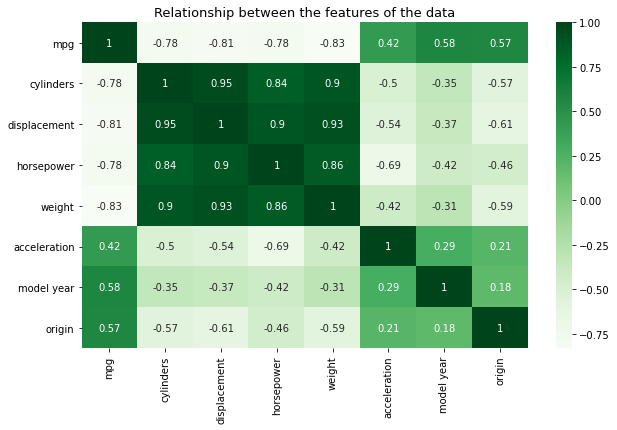

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap=plt.cm.Greens,annot=True)
plt.title('Relationship between the features of the data',
         fontsize=13)
plt.show()

In [15]:
Scaling = preprocessing.StandardScaler()

#since 'displacement','weight','cylinders','horsepower' is highly correlated dropping 'displacement','weight','cylinders'
x = data.drop(columns=['mpg','displacement','weight','cylinders','car name'])
y = data['mpg']

X_scaled = preprocessing.scale(x)
X_scaled = pd.DataFrame(X_scaled,columns=x.columns)
X_scaled.head()

,horsepower,acceleration,model year,origin
0,0.664133,-1.285258,-1.625315,-0.716641
1,1.574594,-1.466724,-1.625315,-0.716641
2,1.184397,-1.648189,-1.625315,-0.716641
3,1.184397,-1.285258,-1.625315,-0.716641
4,0.924265,-1.829655,-1.625315,-0.716641


In [16]:
x_data = X_scaled[['horsepower']]

#### Ex 3. Split the file into train [80%] and test [20%] data
#### Ex 4. Apply linear regression
#### Ex 5. Train the model using the training sets
#### Ex 6. Display the coefficients coef, intercept and residues
#### Ex 7.Predict using test data
#### Ex 8. Perform Accuracy check using the R Square

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y,test_size=.2,random_state=0)

lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)


print('Coefficients: ',lin_reg.coef_,"\n")
print('Intercept: ',lin_reg.intercept_,'\n')

y_predict = lin_reg.predict(x_test)

print('Train score: {}\n'.format(lin_reg.score(x_train,y_train)))
print('Test score: {}\n'.format(lin_reg.score(x_test,y_test)))
print('Mean squared error: %.2f '% mean_squared_error(y_test,y_predict))


Coefficients:  [-6.09095003] 

Intercept:  23.409574588594698 

Train score: 0.5955625946891978

Test score: 0.6456234296465988

Mean squared error: 22.03 


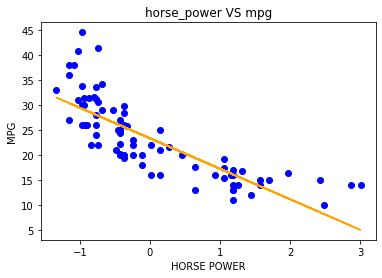

In [18]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_predict, color='orange')
plt.title("horse_power VS mpg")
plt.xlabel("HORSE POWER")
plt.ylabel("MPG")
plt.show()

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 31.1+ KB


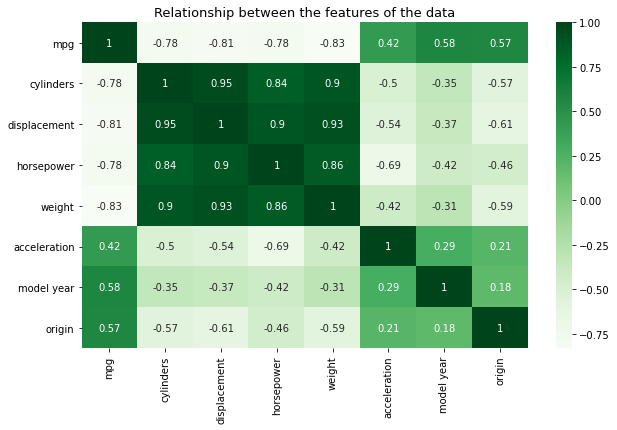

,horsepower,acceleration,model year,origin
0,0.664133,-1.285258,-1.625315,-0.716641
1,1.574594,-1.466724,-1.625315,-0.716641
2,1.184397,-1.648189,-1.625315,-0.716641
3,1.184397,-1.285258,-1.625315,-0.716641
4,0.924265,-1.829655,-1.625315,-0.716641


In [19]:
df = pd.read_csv('auto-mpg.csv',header=None)
df.head()

df_att = pd.read_csv('auto-mpg-names.csv',header=None)
df_att

temp=[]
for i in range(0,len(df_att[0])):
    temp.append(df_att[0][i])
print(temp)    

df.columns=temp

df.to_csv("auto-mpg-data.csv")

data = pd.read_csv("auto-mpg-data.csv",index_col='Unnamed: 0')

data.isnull().sum()

data.head()

data.describe()

data.info()

# Preprocessing

data = data[data.horsepower!='?']
data.horsepower=data.horsepower.astype('int64')

data.describe()

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap=plt.cm.Greens,annot=True)
plt.title('Relationship between the features of the data',
         fontsize=13)
plt.show()

Scaling = preprocessing.StandardScaler()

#since 'displacement','weight','cylinders','horsepower' is highly correlated dropping 'displacement','weight','cylinders'
x = data.drop(columns=['mpg','displacement','weight','cylinders','car name'])
y = data['mpg']

X_scaled = preprocessing.scale(x)
X_scaled = pd.DataFrame(X_scaled,columns=x.columns)
X_scaled.head()

In [20]:
#### Ex 3. Split the file into train [80%] and test [20%] data

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.2,random_state=0)

#### Ex 4. Apply linear regression
#### Ex 5. Train the model using the training sets

lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

#### Ex 6. Display the coefficients coef, intercept and residues

print('Coefficients: {}\n'.format(lin_reg.coef_))
print('Intercept: {}\n'.format(lin_reg.intercept_))

#### Ex 7.Predict using test data

y_predict = lin_reg.predict(x_test)

#### Ex 8. Perform Accuracy check using the R Square

print('Train score: {}\n'.format(lin_reg.score(x_train,y_train)))
print('Test score: {}\n'.format(lin_reg.score(x_test,y_test)))
print('Mean squared error: %.2f \n'% mean_squared_error(y_test,y_predict))
print('r2_score: %.2f '%r2_score(y_test,y_predict))


Coefficients: [-5.0814051  -1.21550024  2.52607978  1.79941141]

Intercept: 23.34959025432823

Train score: 0.7448538116868781

Test score: 0.803951928130104

Mean squared error: 12.19 

r2_score: 0.80 


Repeat the above steps
BEST FIT LINE - Cost function using un-constrained method - Gradient descent

Ex 1. Use the downloaded data

Ex 2. Convert this data to array

Ex 3. Define the learning rate and no. of iterations as 0.0001 and 1000
respectively along with y-intercept and slope

Ex 4. Create the functions to get the BEST FIT line

1. Compute error for the line given the points
2. Step gradient function
3. Gradient descent

Ex 5. Display using scatter plot the data points and the best fit line

Ex 6. Display the Gradient and y-intercept value in the form y = mx+c


slope : -1.1000180323106317 
y_intercept : 4.250407931088679 
MSE_error : 417.24816696869766



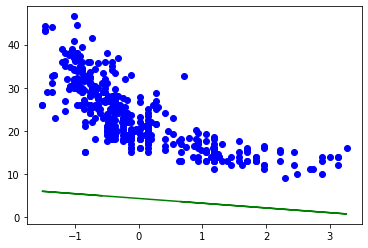

In [21]:
x_array = X_scaled['horsepower']
y_array = data['mpg']

def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.0001

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        
    plt.scatter(x, y, color='blue')    
    plt.plot(x,y_predicted,color='green')    
    return (m_curr,b_curr,cost)

x = np.array(x_array)
y =  np.array(y_array)

slope,y_intercept,MSE_error = gradient_descent(x,y)

print("slope : {} \ny_intercept : {} \nMSE_error : {}\n".format(slope,y_intercept,MSE_error))


Ex 7. Find the BEST FIT line i.e., m and c of y=mx+c with least error using trial and
error method i.e., modify learning rate or iterations or both

slope : -6.067872391122152 
y_intercept : 23.44591831997949 
MSE_error : 23.943662938603097



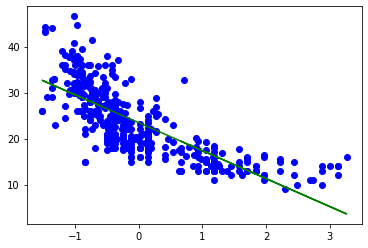

In [22]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = 0.001

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        
        
    plt.scatter(x, y, color='blue')    
    plt.plot(x,y_predicted,color='green')    
    return (m_curr,b_curr,cost)

x = np.array(x_array)
y =  np.array(y_array)

slope,y_intercept,MSE_error = gradient_descent(x,y)
print("slope : {} \ny_intercept : {} \nMSE_error : {}\n".format(slope,y_intercept,MSE_error))

# Machine Learning KNN assignments

In [23]:
data = pd.read_csv("haberman.csv")
data['Survival status'].value_counts()

1    225
2     81
Name: Survival status, dtype: int64

In [24]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

x_train,x_test,y_train,y_test = train_test_split(x,y)


Scaler = preprocessing.StandardScaler()
Scaler.fit(x_train)

x_scaled_train = Scaler.transform(x_train)
x_scaled_test = Scaler.transform(x_test)

classifier= KNeighborsClassifier()
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)

print("y_predicted : " , y_pred,"\n")
print("Accuracy : ",accuracy_score(y_test, y_pred),"\n \n")

print((classification_report(y_test,y_pred)))



y_predicted :  [1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 2
 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 1 1] 

Accuracy :  0.7272727272727273 
 

              precision    recall  f1-score   support

           1       0.76      0.91      0.83        55
           2       0.55      0.27      0.36        22

    accuracy                           0.73        77
   macro avg       0.65      0.59      0.60        77
weighted avg       0.70      0.73      0.69        77

